# Aula de Árvore de regressão

Autor: Rafael de Carvalho Ceregatti de Console

## História 

O primeiro algoritmo de árvore de regressão foi proposto em 1963 por Morgan & Sonquist. O nome do primeiro algoritmo é Automatic Interaction Detector (AID).

## Terminologia da árvore

- <b>Nó raiz</b>: Representa todas as observações.
- <b>Divisão</b>: Processo de dividir um nó em dois sub-nós.
- <b>Nó de decisão</b>: Quando um sub-nó é dividido em dois sub-nós.
- <b>Folha ou nó de término</b>: Corresponde ao nó sem divisão.
- <b>Ramificação</b>: Subseção de uma árvore.
- <b>Nó pai e nó filho</b>: Um nó que é dividido em sub-nós e chamado de nó pai. Os sub-nós são os nós filhos do nó pai.

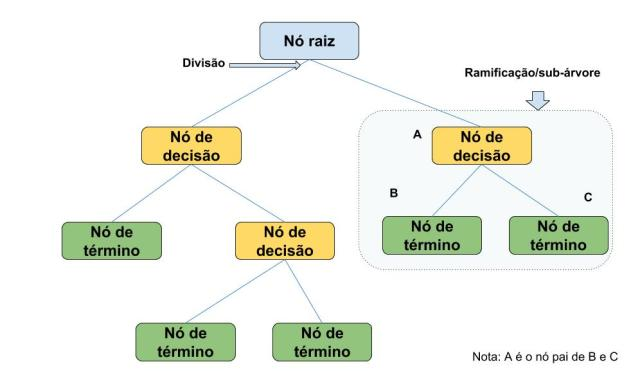

## Exemplo de árvore


Considere o seguinte exemplo (meramente ilustrativo). O conjunto de dados de interesse, possui as seguintes variáveis:
- Idade (variável numérica de contagem)
- Faculdade (1: tem faculdade, 0: não tem faculdade)
- Renda (variável numérica contínua)

| Idade | Faculdade | Renda |
| --- | --- | --- |
| 18 | 0 | 1800 |
| 28 | 0 | 3800 |
| 36 | 0 | 4200 |
| 40 | 0 | 6000 |
| 25 | 1 | 4200 |
| 32 | 1 | 5300 |
| 40 | 1 | 5800 |
| 54 | 1 | 7200 |



Com estes dados, a seguinte árvorede de regressão (apenas para ilustração) foi criada: 

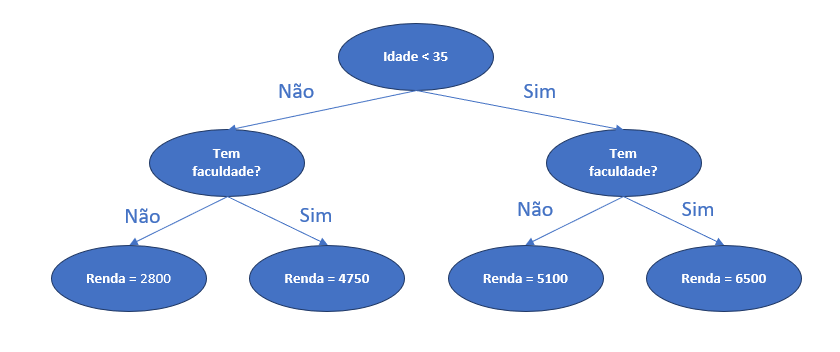

> Note que foi criado uma partição no espaço das features! Observe também que as estimativas consistem na média de cada partição. 

## Processo de divisão

> Como encontrar a melhor partição em termos de MSE? Processo de divisão binária recursiva!

Considere uma variável de partição $j$ e um ponto de corte $t$. COm estes dois elementos, temos a partição:

$$R_1(j,t) = \{X|X_j \leq t\} \ e \ R_2(j,t) = \{X|X_j > t\}.$$

Portanto é feito a busca da variável de partição e do ponto de corte tal que:

$$\min_{j, t}\left\{\min_{c_1} \sum_{i:x\in R_1(j,t)}(y_i - c_1)^2 + \min_{c_2} \sum_{i:x\in R_2(j,t)}(y_i - c_2)^2\right\}$$



<b>OBS</b>: Para qualquer variável $j$ e qualquer ponto de corte $t$, os valores que minimizam a parcela dentro do chaves é dado por

$$\hat{c}_1 = \frac{1}{\#\{y_i: x_i \in R_1(j,t)\}}\sum_{y_i: x_i \in R_1(j,t)\}}y_i$$

e 

$$\hat{c}_2 = \frac{1}{\#\{y_i: x_i \in R_2(j,t)\}}\sum_{y_i: x_i \in R_2(j,t)\}}y_i$$

Encontrado a melhor partição, dividi-se os dados em duas partes e se repete o processo!!


Deste modo, para $m$ partições $(R_1, R_2, \cdots, R_m)$, a função da árvore de regressão é dada por 

$$f(x) = \sum_{i=1}^m c_i \mathbb{1}_{x \in R_i} $$

---

## Apontamentos

Com o que foi apresentado até aqui, algumas questões aparecem, como por exemplo:

- Faz sentido as folhas terem duas observações?
- Quantas observações são necessárias para se ter uma estimativa para uma folha?
- Qual o mínimo de observações para se realizar uma nova partição? 
- Qual o tamanho da árvore deve ser considerada?
- Como posso simplificar a árvore de regressão?

Estas questões estão fundamentalmente ligadas a construção da árvore de regressão. Para adentrar e entender melhor estas questões, utilizaremos a função DecisionTreeRegressor do sklearn. Cabe ressaltar que cada questão está associada a um parâmetro da árvore de regressão!  



## Criando base de dados 

Primeiramente, criaremos um conjunto de dados artificial para entender as perguntas acima. 

In [4]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from matplotlib.colors import ListedColormap

In [5]:
# Criando um dataframe com a feature e a targe - relacionamento polinomial
np.random.seed(42)
df = pd.DataFrame({'feature' : np.sort(np.random.uniform(-10,10,200)), 'var_aux' : np.random.normal(0, 70, 200)})
df['target'] = df['feature']**3 + df['var_aux'] 
df = df.drop(columns = ['var_aux']).round(2)
# Separando target da feature
X = df.drop(columns=['target']).values
y = df['target'].values

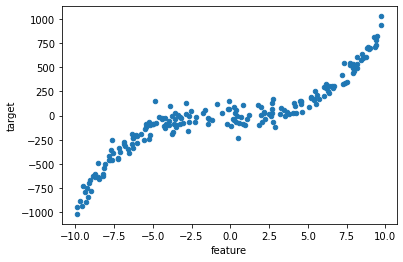

In [6]:
# scatter plot dos dados
scatter_plot = df.plot.scatter(x = 'feature',y = 'target')
scatter_plot.plot()
plt.show()

## Parâmetro max_depth

O parâmetro max_depth controla a profundidade máxima da árvore. Abaixo vamos entender como o parâmetro max_depth interfere no ajuste da árvore de regressão

In [4]:
# Arvore de regressao
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)
# Ajustando o modelo
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
# Predizendo os resultados
y_pred_1 = regr_1.predict(X)
y_pred_2 = regr_2.predict(X)
y_pred_3 = regr_3.predict(X)

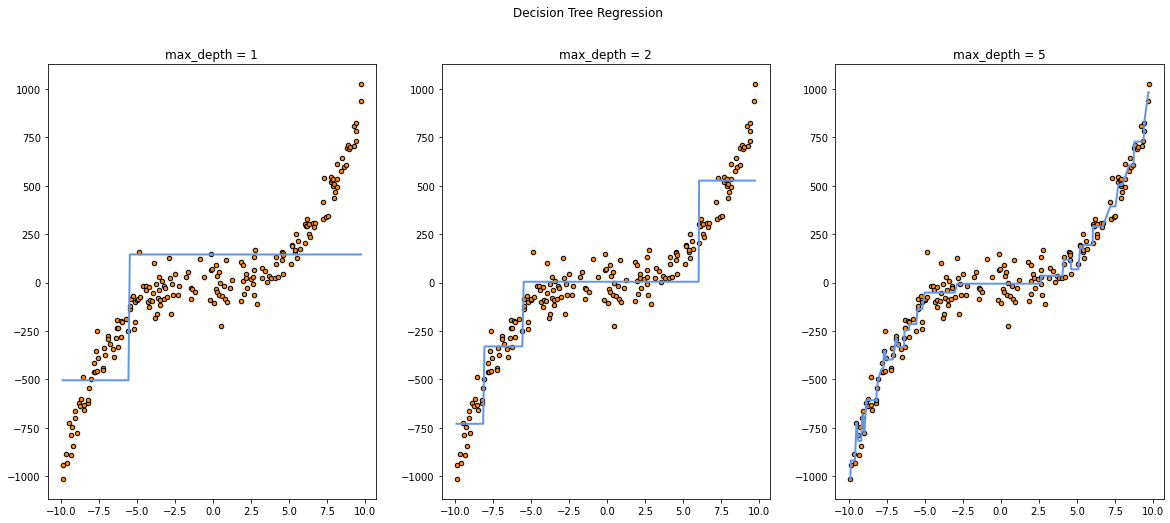

In [5]:
# Ilustração dos ajustes
plt.figure(figsize=(20, 8)) 
# 1 gráfico
plt.subplot(1, 3, 1)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_1, color="cornflowerblue", linewidth=2)
plt.title("max_depth = 1")
# 2 gráfico          
plt.subplot(1, 3, 2)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_2, color ="cornflowerblue", linewidth=2)
plt.title("max_depth = 2")          
# 3 gráfico          
plt.subplot(1, 3, 3)
plt.scatter(X, y, s=20, edgecolor = "black", c="darkorange")
plt.plot(X, y_pred_3, color="cornflowerblue", linewidth=2)
plt.title("max_depth = 5")

plt.suptitle("Decision Tree Regression")
plt.show()

In [6]:
# exportando arvore
export_graphviz(regr_1, out_file ='tree.dot', feature_names =['x'])
export_graphviz(regr_2, out_file ='tree2.dot', feature_names =['x'])

Copie e cole o conteúdo do arquivo .dot no link: http://www.webgraphviz.com/

#### Arvore max_depth = 1

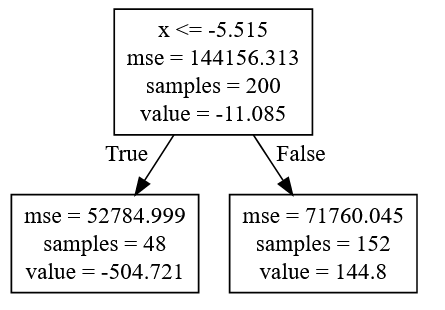

#### Arvore max_depth = 2

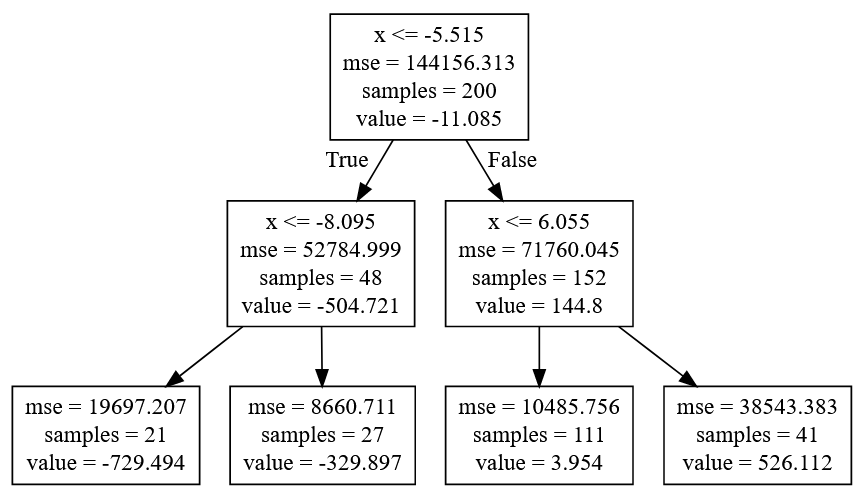

In [7]:
# Calculando a média manualmente
mean_leaf = df.query('feature <= -8.095').mean().round(3)[1]
print(f"Para os valores que possuem feature menor que -8.095, a média da target é igual a: {mean_leaf}")

Para os valores que possuem feature menor que -8.095, a média da target é igual a: -729.494


## Parâmetro min_samples_leaf

O parâmetro min_samples_leaf controla o número mínimo de observações em uma folha. Abaixo vamos entender como o parâmetro min_samples_leaf interfere no ajuste da árvore de regressão

In [8]:
# Arvore de regressao
regr_msl1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20)
regr_msl2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=25)
# Ajustando o modelo
regr_msl1.fit(X, y)
regr_msl2.fit(X, y)
# Predizendo os resultados
y_pred_msl_1 = regr_msl1.predict(X)
y_pred_msl_2 = regr_msl2.predict(X)

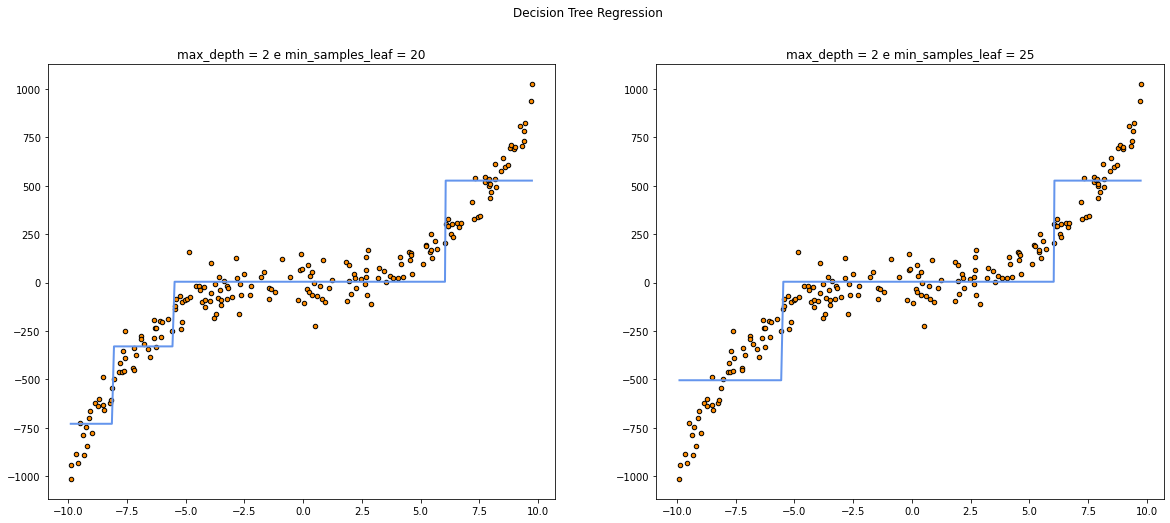

In [9]:
# Ilustração dos ajustes
plt.figure(figsize=(20, 8)) 
# 1 gráfico
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_msl_1, color="cornflowerblue", linewidth=2)
plt.title("max_depth = 2 e min_samples_leaf = 20")
# 2 gráfico          
plt.subplot(1, 2, 2)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_msl_2, color ="cornflowerblue", linewidth=2)
plt.title("max_depth = 2 e min_samples_leaf = 25")          

plt.suptitle("Decision Tree Regression")
plt.show()

## Parâmetros min_samples_split

O parâmetro min_samples_split controla o número mínimo de observações para que seja feito o processo de divisão. Abaixo vamos entender como o parâmetro min_samples_split interfere no ajuste da árvore de regressão

In [10]:
# Arvore de regressao
regr_mss1 = DecisionTreeRegressor(max_depth=2, min_samples_split=40)
regr_mss2 = DecisionTreeRegressor(max_depth=2, min_samples_split=50)
# Ajustando o modelo
regr_mss1.fit(X, y)
regr_mss2.fit(X, y)
# Predizendo os resultados
y_pred_mss_1 = regr_mss1.predict(X)
y_pred_mss_2 = regr_mss2.predict(X)

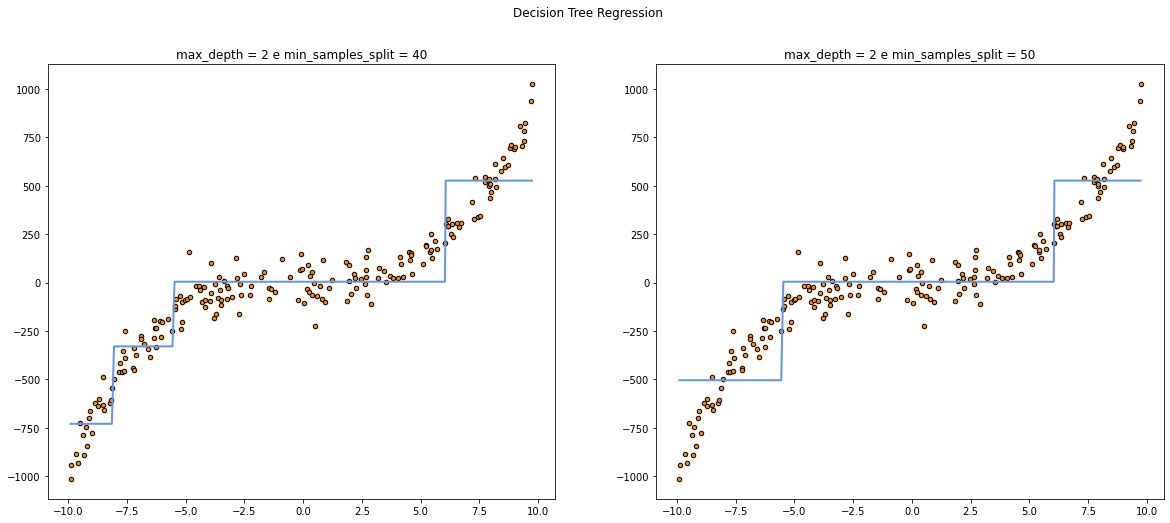

In [11]:
# Ilustração dos ajustes
plt.figure(figsize=(20, 8)) 
# 1 gráfico
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_mss_1, color="cornflowerblue", linewidth=2)
plt.title("max_depth = 2 e min_samples_split = 40")
# 2 gráfico          
plt.subplot(1, 2, 2)
plt.scatter(X, y, s=20, edgecolor = "black", c = "darkorange")
plt.plot(X, y_pred_mss_2, color ="cornflowerblue", linewidth=2)
plt.title("max_depth = 2 e min_samples_split = 50")          

plt.suptitle("Decision Tree Regression")
plt.show()

## Parametro max_features

O parâmetro max_features controla o número de variáveis a serem consideradas no processo de divisão. Abaixo vamos entender como o parâmetro max_features interfere no ajuste da árvore de regressão

In [47]:
#adicionando uma nova coluna de feature
np.random.seed(1964)
df['feature_2'] = np.random.lognormal(0, 1, 200)
X = df.drop(columns=['target']).values
y = df['target'].values

In [18]:
regr_mf1 = DecisionTreeRegressor(max_depth=2, max_features=1)
regr_mf2 = DecisionTreeRegressor(max_depth=2, max_features=2)
# Ajustando o modelo
regr_mf1.fit(X, y)
regr_mf2.fit(X, y)
# Predizendo os resultados
y_pred_mf_1 = regr_mf1.predict(X)
y_pred_mf_2 = regr_mf2.predict(X)

In [28]:
export_graphviz(regr_mf1, out_file ='tree3.dot', feature_names =['feature', 'feature_2'])
export_graphviz(regr_mf2, out_file ='tree4.dot', feature_names =['feature', 'feature_2'])

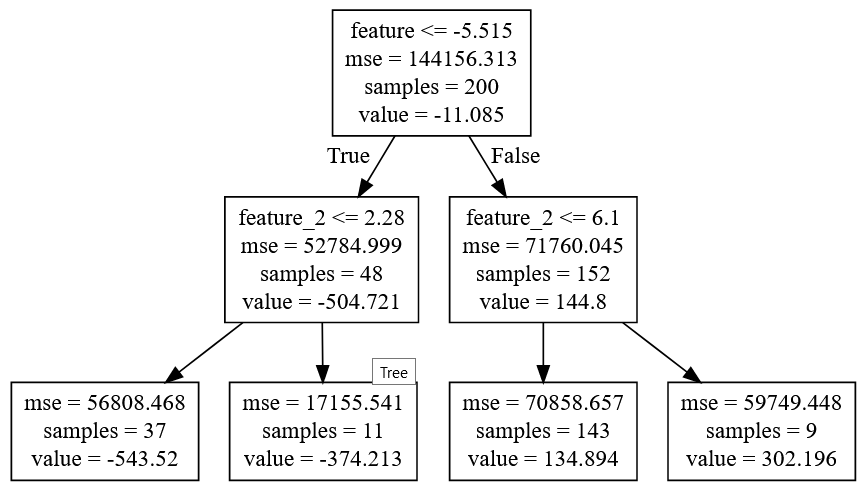

(-10.0, 10.0, 0.0, 19.0)

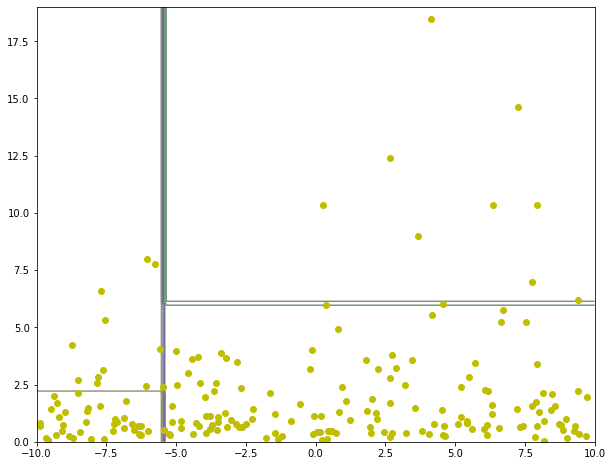

In [29]:
axes=[-10, 10, 0, 19]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = regr_mf1.predict(X_new).reshape(x1.shape)
custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
plt.figure(figsize=(10, 8)) 
plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
plt.plot(X[:, 0], X[:, 1], "yo", label="Iris-Setosa")
plt.axis(axes)

In [30]:
df.query('feature > -5.515 and feature_2 <= 6.1').mean()[1]

134.89356643356646

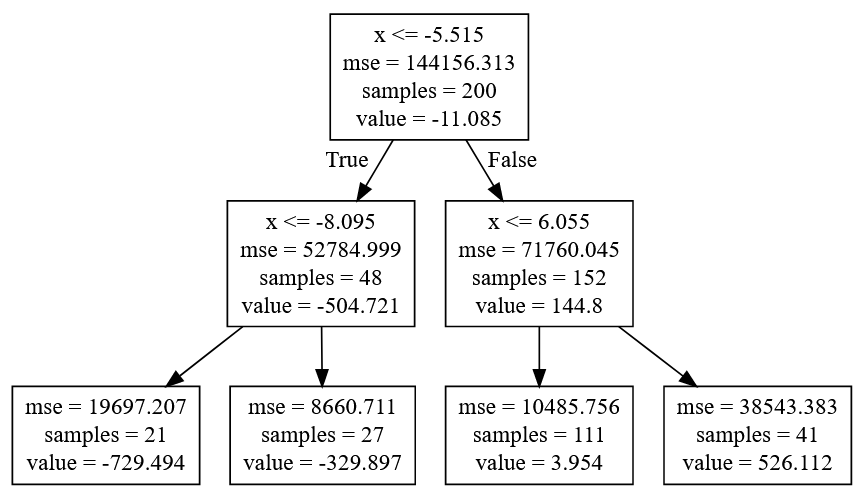

## Cost Complexity Prune

In [34]:
path = regr_mf2.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [36]:
clf_dts = []

In [37]:
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X, y)
    clf_dts.append(clf_dt)

In [39]:
score = [clf_dt.score(X,y) for clf_dt in clf_dts]

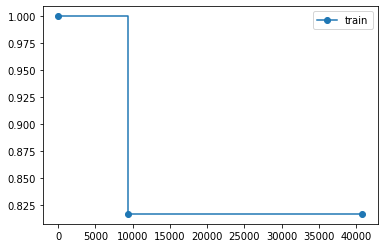

In [42]:
fig, ax = plt.subplots()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.plot(ccp_alphas, score, marker = 'o', label = 'train', drawstyle = 'steps-post')
#ax.plot(ccp_alphas, score_test, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.legend()
plt.show()

## Regression criteria

Podemos utilizar três critérios:
- MSE
- MAE
- Half Poisson Deviance

In [9]:
regr_rc = DecisionTreeRegressor(criterion = 'mae', max_depth=2)
regr_rc.fit(X, y)
y_pred_rc = regr_rc.predict(X)
export_graphviz(regr_rc, out_file ='tree5.dot', feature_names =['feature'])

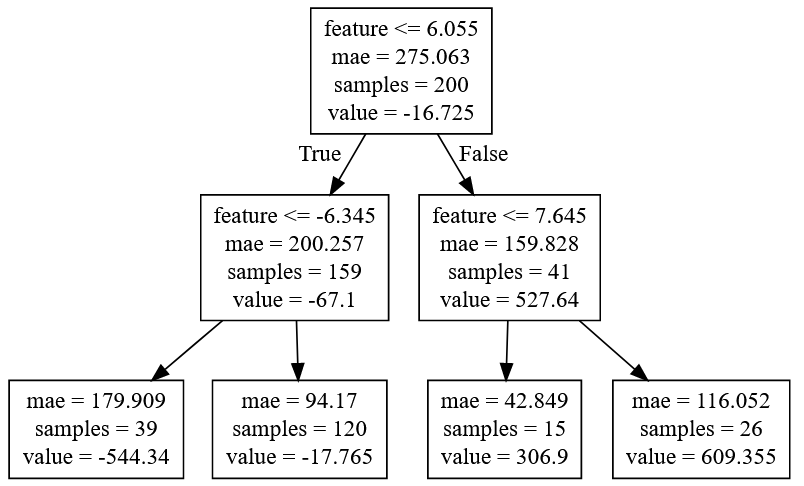

In [20]:
est_folha_media = df.query('feature < -6.345').mean().round(2)[1]
est_folha_mediana = df.query('feature < -6.345').median()[1]
print(f'A média dos resultados da folha com 39 observações é {est_folha_media}')
print(f'A mediana dos resultados da folha com 39 observações é {est_folha_mediana}')

A média dos resultados da folha com 39 observações é -566.84
A mediana dos resultados da folha com 39 observações é -544.34


## Cost Complexity Prune


In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
regr_ccp = DecisionTreeRegressor()
regr_ccp_fit = regr_ccp.fit(X_train, y_train)
path = regr_ccp_fit.cost_complexity_pruning_path(X_train, y_train)

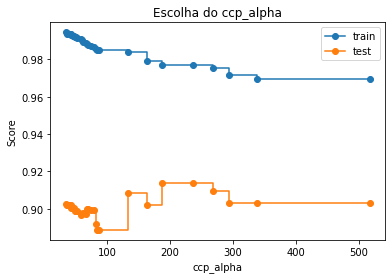

In [58]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[100:130]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

score = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
score_test = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Score')
ax.set_title('Escolha do ccp_alpha')
ax.plot(ccp_alphas, score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, score_test, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

## Vantagens da árvore de regressão

- Funciona com outlier 
- Fácil de interpretar

## Desvantagens da árvore de regressão

- Instabilidade
- Cortes ortogonais
- Fácil de sobreajustar 